# Exploratory and Predictive Analysis of Diabetes Dataset

## Objective

The objective of this study is to conduct an exploratory data analysis on the diabetes dataset and create a predictive model (decision tree)
that can help patients know whether or not they are prone to diabetes.


## Introduction
### What Is Diabetes?

Diabetes is a chronic health condition that affects how the body turns food into energy. Diabetes occurs either when the pancrease does not produce enough insulin(homone that regulates blood sugar levels) or when the body does not effectively use the insulin it produces. Hyperglycaemia(elevated blood sugar), is a common effect of uncontrolled diabetes and over time
it can result to serious damage of the body systems.

**Gestational diabetes** is a diabetes diagnosed for the first time during  pregnancy. This type of diabetes can affect the mother and the unborn child. An early diagnosis is important for prenatal care.

### Effects of Gestational Diabetes

1. Macrosomia: This is the term used to describe a baby born murch larger than normal.
    
2. Preeclampsia: This is a condition where the mother develops high blood pressure during pregnancy.
    
3. Increases the chances of early labor.

4. The mother may develop type2 diabetes.

5. Some babies may have low blood sugar levels shortly after birth.

### Signs of Gestational Diabetes

Most of the time, gestational diabetes doesn't cause noticeable signs or symptoms. However, increased thirst and more-frequent urination are possible symptoms.

## About The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females who are at least 21 years old and of Pima Indian heritage.

## Analysis
### Data Cleaning

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree
from sklearn.tree import export_graphviz 
from IPython.display import Image 
import pydotplus

In [3]:
# Import dataset
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check for null values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# There are no null values in the data set.
# Statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# From the  minimum values, it is possible that there are null values
# that are replaced by 0 in some of the columns.
# Replacing the 0 with null

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

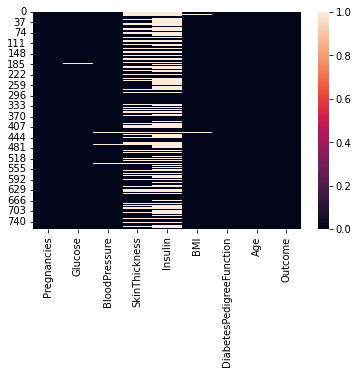

In [7]:
#visual of the null values
sns.heatmap(df.isnull())

In [8]:
# The number of null values is quite significant.
# Therefore, instead of dropping them, I filled them up with the mean.
df = df.fillna(df.mean())
df.to_numpy
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploratory Analysis

In [9]:
# To Be Done (TBD)

### Predictive Analysis (Decision Tree)
  

The dataset is clean and ready to be used to create the predictive model. The aim is to make a model that will predict the outcome (if a patient is diabetic or not) after considering the following variables: Pregnancies, Insulin, BMI, Age, Glucose, BloodPressure and DiabetesPedigreeFunction.
    


In [10]:
# Splitting the data into feature and target variable
feature= ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose',
          'BloodPressure', 'DiabetesPedigreeFunction']
X=df[feature]
y=df.Outcome

print(X)

     Pregnancies     Insulin   BMI  Age  Glucose  BloodPressure  \
0              6  155.548223  33.6   50    148.0           72.0   
1              1  155.548223  26.6   31     85.0           66.0   
2              8  155.548223  23.3   32    183.0           64.0   
3              1   94.000000  28.1   21     89.0           66.0   
4              0  168.000000  43.1   33    137.0           40.0   
..           ...         ...   ...  ...      ...            ...   
763           10  180.000000  32.9   63    101.0           76.0   
764            2  155.548223  36.8   27    122.0           70.0   
765            5  112.000000  26.2   30    121.0           72.0   
766            1  155.548223  30.1   47    126.0           60.0   
767            1  155.548223  30.4   23     93.0           70.0   

     DiabetesPedigreeFunction  
0                       0.627  
1                       0.351  
2                       0.672  
3                       0.167  
4                       2.288  
.. 

In [11]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
# Dividing data set to training set and testing set 
# to understand the model's performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# 70% training and 30% test

In [13]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


The prediction model will have an accuracy of 76%

[Text(0.5, 0.875, 'X[4] <= 127.5\nentropy = 0.933\nsamples = 768\nvalue = [500, 268]'),
 Text(0.25, 0.625, 'X[2] <= 26.45\nentropy = 0.709\nsamples = 485\nvalue = [391, 94]'),
 Text(0.125, 0.375, 'X[1] <= 48.5\nentropy = 0.069\nsamples = 122\nvalue = [121, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 112\nvalue = [112, 0]'),
 Text(0.375, 0.375, 'X[3] <= 28.5\nentropy = 0.821\nsamples = 363\nvalue = [270, 93]'),
 Text(0.3125, 0.125, 'entropy = 0.521\nsamples = 188\nvalue = [166, 22]'),
 Text(0.4375, 0.125, 'entropy = 0.974\nsamples = 175\nvalue = [104, 71]'),
 Text(0.75, 0.625, 'X[2] <= 29.95\nentropy = 0.962\nsamples = 283\nvalue = [109, 174]'),
 Text(0.625, 0.375, 'X[4] <= 145.5\nentropy = 0.904\nsamples = 75\nvalue = [51, 24]'),
 Text(0.5625, 0.125, 'entropy = 0.61\nsamples = 40\nvalue = [34, 6]'),
 Text(0.6875, 0.125, 'entropy = 0.999\nsamples = 35\nvalue = [17, 18]'),
 Text(0.875, 0.375, 'X[4] <= 157.5\n

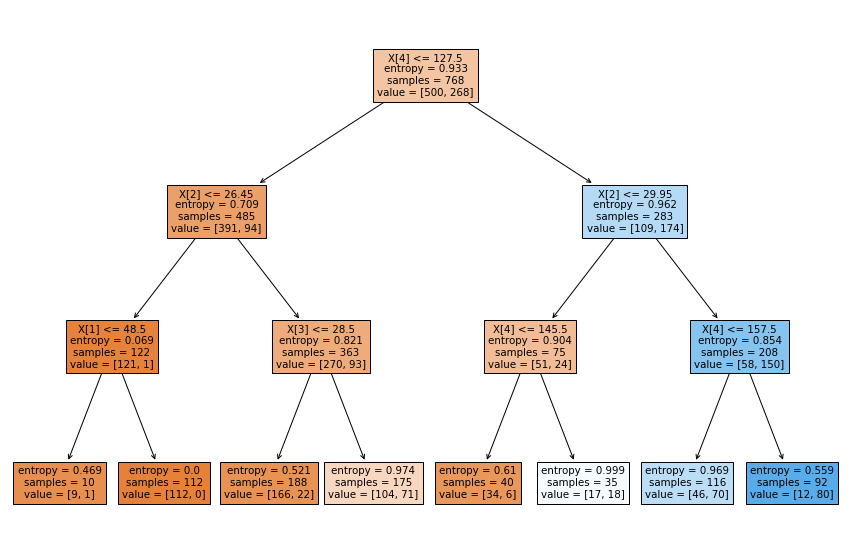

In [14]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X, y)
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
# Running a test on the model 
print("Outcome: ", clf.predict([[2, 115, 25, 30, 183, 72, 0.6]]))

Outcome:
- 1 means positive and indicates the subject has diabetes
- 0 means negative and indicates the subject does not have diabetes.